# 蠟燭線回測
### 初始資料拿取

In [48]:
import numpy as np
import pandas as pd
import talib
from talib import MACD
from scipy.signal import argrelextrema
import matplotlib as plt

%matplotlib inline

In [3]:
df = pd.read_csv('TXF\TXF.txt', sep=",")
df['DateTime'] = df.Date + ' ' + df.Time

In [122]:
prices = df.iloc[2000:2500,:].copy()

In [123]:
def get_max_min(prices, smoothing, window_range):
    smooth_prices = prices['Close'].rolling(window=smoothing).mean().dropna()
    local_max = argrelextrema(smooth_prices.values, np.greater)[0]
    local_min = argrelextrema(smooth_prices.values, np.less)[0]
    price_local_max_dt = []

    for i in local_max:
        if (i>window_range) and (i<len(prices)-window_range):
            price_local_max_dt.append(prices.iloc[i-window_range:i+window_range]['High'].idxmax())
    price_local_min_dt = []
    for i in local_min:
        if (i>window_range) and (i<len(prices)-window_range):
            price_local_min_dt.append(prices.iloc[i-window_range:i+window_range]['Low'].idxmin())  

    maxima = pd.DataFrame(prices.loc[price_local_max_dt])
    minima = pd.DataFrame(prices.loc[price_local_min_dt])
#     max_min = pd.concat([maxima, minima]).sort_index()
    maxima.index.name = 'date'
    minima.index.name = 'date'
    
    maxima = maxima.reset_index()
    maxima = maxima[~maxima.date.duplicated()]
    p = prices.reset_index()   
    maxima['day_num'] = p[p['index'].isin(maxima.date)].index.values
    maxima = maxima.set_index('day_num')['High']
    
    minima = minima.reset_index()
    minima = minima[~minima.date.duplicated()]  
    minima['day_num'] = p[p['index'].isin(minima.date)].index.values
    minima = minima.set_index('day_num')['Low']
    
    return maxima, minima

In [126]:
smoothing = 5
window = 20

maxima, minima = get_max_min(prices, smoothing, window)

In [133]:
maxima.iloc[0]

9390.0

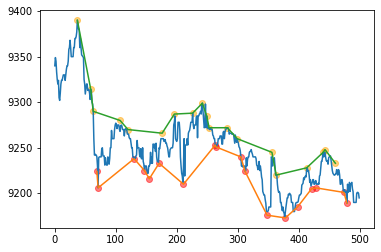

In [127]:
prices.reset_index()['Close'].plot()
plt.pyplot.scatter(maxima.index, maxima.values, color='orange', alpha=.5)
plt.pyplot.scatter(minima.index, minima.values, color='red', alpha=.5)

x = minima.index
y = minima.values
plt.pyplot.plot(x, y)

x = maxima.index
y = maxima.values
plt.pyplot.plot(x, y)

In [135]:
accumu = 0
buy_point = 0
close_now = 0
exit_point = 0
earn = []
portion = 1
smoothing = 5
window = 20

maxima, minima = get_max_min(df.iloc[100+i:200+i, :], smoothing, window)

trend_index = []
trend_price = []
trend_index.append(minima.index[-1])
trend_price.append(minima.values[-1])

#initial
buy_point = prices.Close.values[0]
n = 200
for i, close in enumerate(prices.Close.values):
    diff = close - buy_point
    maxima, minima = get_max_min(df.iloc[n-100+i:n+i, :], smoothing, window)
    slope = (minima.values[-1] - trend_price[0])/( minima.index[-1] - trend_index[0] )
    if diff < -20:
        earn.append(diff)
        portion = 0
    
    if portion == 1:
        
        if minima.index[-1] != trend_index[0]:
            if minima.values[-1] > trend_price[0]:
                slope = (minima.values[-1] - trend_price[0])/( minima.index[-1] - trend_index[0] )
        target = minima.values[-1] + (n+i-minima.index[-1])*slope
        
        if close < target:
            diff = close - buy_point
            earn.append(diff)
            portion = 0
    
    if portion == 0:
        pass
        
        

C:\Users\Drey\anaconda3\envs\finlab\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


In [136]:
earn

[-35.0,
 -38.0,
 -30.0,
 -31.0,
 -25.0,
 -27.0,
 -26.0,
 -26.0,
 -30.0,
 -37.0,
 -26.0,
 -28.0,
 -40.0,
 -42.0,
 -50.0,
 -80.0,
 -98.0,
 -97.0,
 -98.0,
 -98.0,
 -100.0,
 -110.0,
 -134.0,
 -101.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -91.0,
 -90.0,
 -99.0,
 -99.0,
 -99.0,
 -109.0,
 -101.0,
 -108.0,
 -109.0,
 -109.0,
 -100.0,
 -102.0,
 -108.0,
 -102.0,
 -90.0,
 -90.0,
 -71.0,
 -80.0,
 -80.0,
 -80.0,
 -80.0,
 -70.0,
 -65.0,
 -63.0,
 -65.0,
 -69.0,
 -65.0,
 -65.0,
 -65.0,
 -70.0,
 -72.0,
 -66.0,
 -65.0,
 -66.0,
 -70.0,
 -70.0,
 -70.0,
 -77.0,
 -70.0,
 -69.0,
 -70.0,
 -70.0,
 -75.0,
 -75.0,
 -75.0,
 -79.0,
 -80.0,
 -80.0,
 -85.0,
 -90.0,
 -90.0,
 -100.0,
 -100.0,
 -102.0,
 -101.0,
 -102.0,
 -99.0,
 -98.0,
 -82.0,
 -90.0,
 -90.0,
 -90.0,
 -98.0,
 -100.0,
 -91.0,
 -102.0,
 -102.0,
 -90.0,
 -105.0,
 -108.0,
 -115.0,
 -110.0,
 -110.0,
 -110.0,
 -115.0,
 -118.0,
 -118.0,
 -110.0,
 -110.0,
 -108.0,
 -95.0,
 -107.0,
 -100.0,
 -107.0,
 -86.0,
 -86.0,
 -90.0,
 -86.0,
 -94.0,
 -85.0,
 -100.0,
 -105.0

In [193]:
df['MA60'] = talib.SMA(df.Close, timeperiod=60)
df['MA20'] = talib.SMA(df.Close, timeperiod=20)

In [194]:
df['MACD'], df['MACDsignal'], macdhist = MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

In [195]:
df['Diff'] = df['Close'] - df['MA20']
df['MACD_Diff'] = df.MACD.diff()

In [196]:
# compute buy and sell signals (golden cross and death cross)
signal_long = (df.Diff > 0) & (df.MACD_Diff > 0)
signal_short = (df.MACD_Diff < 0)
# signal_long = (df.Close < df.MA20)
# signal_short = (df.Close > df.MA20)
# combine long and short signals
signal = signal_long.copy()
signal[signal_short] = -1

In [197]:
buy.tail()

4996    False
4997    False
4998     True
4999    False
5000    False
dtype: bool

In [198]:
close = df.Close
open_ = df.Open

### 計算買入時間

<AxesSubplot:>

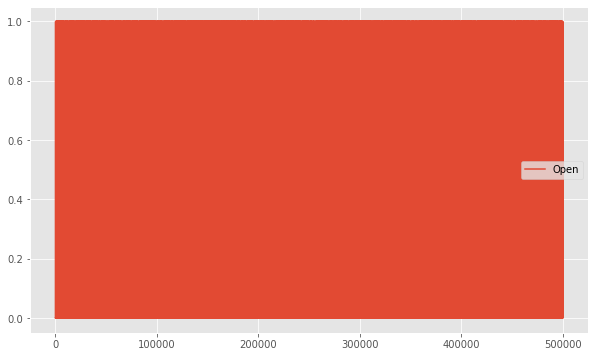

In [199]:
buy = (signal > 0)
sell = close < close.rolling(20).mean()
    
hold = pd.DataFrame(np.nan, index=close.index, columns=['Open'])
hold[buy] = 1
hold[sell] = 0
hold.ffill(inplace=True)
hold.fillna(0, inplace=True)
hold = hold.shift()

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
hold.plot()

### 計算報酬率

In [200]:
import matplotlib.pyplot as plt

gain = (open_.shift(-1).ffill() / open_.ffill()).to_frame()

In [201]:
eq = (gain[hold == 1].mean(axis=1)).fillna(1).cumprod()
# eq = gain[hold == 1]

<AxesSubplot:>

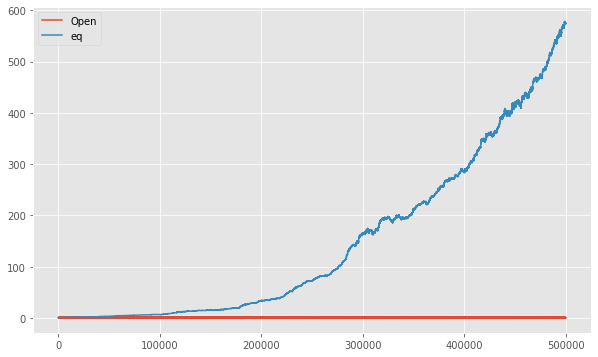

In [202]:
draw_df = hold.copy()
draw_df['eq'] = eq

draw_df.plot()

### 不要每天都rebalance

2.3126964791497087

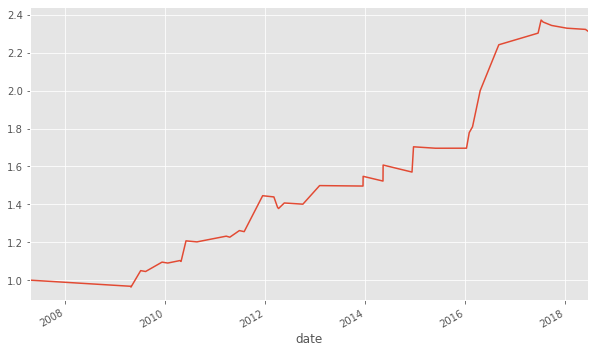

In [5]:
rebalance = (hold.diff().abs().sum(axis=1) != 0).cumsum()
rebalance_hold = hold[rebalance.diff() != 0]
rebalance_gain = gain.groupby(rebalance.values).apply(lambda s:s.cumprod().iloc[-1])
rebalance_gain.index = rebalance_hold.index

# 手續費
position_diff = rebalance_hold.div(rebalance_hold.sum(axis=1), axis=0).fillna(0).diff()
tax_ratio = position_diff.copy()
tax_ratio[tax_ratio < 0] *= (1.425/1000 + 3/1000)
tax_ratio[tax_ratio > 0] *= (1.425/1000)
tax_ratio = tax_ratio.abs().sum(axis=1)


eq2 = (rebalance_gain[rebalance_hold == 1].mean(axis=1).fillna(1) * (1 - tax_ratio)).cumprod()
eq2.plot()
eq2.iloc[-1]

## 考慮手續費

In [7]:
import pickle
pickle.dump(eq, open('return_history.pkl', 'wb'))